# WEEK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import folium

%matplotlib inline

In [2]:
building_permits = pd.read_csv('../data/Building_Permits_Issued.csv', low_memory = False)

In [3]:
building_permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COMMON AREA HOMES AT BRIAR,COLE INVESTMENTS LLC,CAUO,CAA03R301,3611315,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,37010802.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,02/27/2019,07/22/2019,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,W/S HILLSBORO PK. & N/S ABBOTT MARTIN RD.,"BATTINO CONTRACTING SOLUTIONS, LLC",CACR,CAF19A203,3613106,2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,37017901.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372..."
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,LOT 408 THE RESERVE AT STONE HALL PH 2 SEC 1,MERITAGE HOMES OF TENNESSEE INC,CARN,CAA01R301,3687554,New Single Family construction - Total Sq foot...,14.0,37015402.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
4,2017000049,Building Residential - New,Single Family Residence,164100A43100CO,01/03/2017,01/09/2017,268107.0,704 ABERCORN CT,ANTIOCH,TN,37013,LOT 79 SUMMERFIELD SUBDIVISION VILLAGE TEN,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,3306701,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 2380 S...,32.0,37015630.0,"704 ABERCORN CT\nANTIOCH, TN 37013\n(36.045042..."


In [4]:
building_permits.tail(7)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
34467,2017062064,Building Residential - Addition,Single Family Residence,07209025900,09/25/2017,09/25/2017,57452.0,1001 FAIRWIN AVE,NASHVILLE,TN,37216,LOT 21 ESKRIDGE SUB,DOTSON GROUP LLC,CARA,CAA01R301,3408732,to construct 510SF addition to the rear of exi...,5.0,37011400.0,"1001 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.199..."
34468,2017080442,Building Residential - Addition,Single Family Residence,13004005000,12/18/2017,01/08/2018,300000.0,4215 SNEED RD,NASHVILLE,TN,37215,PT LOT 4 BELLEMEADE ANNEX,VAN MOL RESTORATION LLC,CARA,CAA01R301,3433097,Remodel Kitchen. Open back wall of home to add...,34.0,37017902.0,"4215 SNEED RD\nNASHVILLE, TN 37215\n(36.100397..."
34469,2018065491,Building Residential - Addition,Single Family Residence,08307030200,10/16/2018,10/30/2018,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,PT LOT 2 ROLLING ACRES,"ALFORD BUILDERS, LLC",CARA,CAA01R301,3569305,to construct 2 story addition which will add 1...,6.0,37012100.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."
34470,2017019524,Building Residential - Addition,Single Family Residence,04313027400,03/22/2017,03/22/2017,20000.0,316 CHERRY ST,MADISON,TN,37115,LOT 25 BLK C CRITTENDEN EST,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARA,CAA01R301,3338760,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,37010701.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ..."
34471,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,02/13/2018,04/17/2018,14000.0,131 EDENWOLD RD,MADISON,TN,37115,LOTS 18 19 PT 20 BLK A EDENWOLD CITY SUB,sergy motorny,CACR,CAD02B016,3446279,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,37010401.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001..."
34472,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,07/10/2017,08/23/2017,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,PT LOT 15 ORIGINAL TOWN OF NASHVILLE,GENERAL SIGN SERVICES,CASN,CAZ02A001,3384196,to erect 28SF illuminated wall sign for Famous...,19.0,37019500.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296..."
34473,2018059022,Building Residential - New,Single Family Residence,163020C32000CO,09/17/2018,09/26/2018,140813.0,1382 RURAL HILL RD 320,ANTIOCH,TN,37013,UNIT 320 AUTUMN RIDGE TOWNHOMES 3RD AMEND,R J YORK HOMES LLC,CARN,CAA01R301,3560019,TO CONSTRUCT A NEW SINGLE FAMILY UNIT AT 1250 ...,32.0,37015628.0,"1382 RURAL HILL RD 320\nANTIOCH, TN 37013\n(36..."


In [5]:
building_permits.shape

(34474, 20)

In [6]:
building_permits.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Construction Cost', 'Address',
       'City', 'State', 'ZIP', 'Subdivision / Lot', 'Contact', 'Permit Type',
       'Permit Subtype', 'IVR Tracking #', 'Purpose', 'Council District',
       'Census Tract', 'Mapped Location'],
      dtype='object')

In [7]:
keep_cols = ['Permit #',
'Permit Type Description',
'Permit Subtype Description',
'Parcel',
'Date Entered',
'Date Issued',
'Construction Cost',
'Address',
'City',
'State',
'ZIP',
'Contact',
'Purpose',
'Council District',
'Mapped Location']

In [8]:
building_permits = building_permits[keep_cols]

In [9]:
rename_cols = [
    'number',
    'type_desc',
    'subtype_desc',
    'parcel',
    'date_entered',
    'date_issued',
    'cost',
    'address',
    'city',
    'state',
    'zip_code',
    'contact',
    'purpose',
    'council_district',
    'mapped_location'
]

In [10]:
building_permits.columns = rename_cols

In [11]:
building_permits['contact'].value_counts()

SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INFORMATION)    3061
SELF CONTRACTOR COMMERCIAL (SEE APPLICANT INFORMATION)      746
OLE SOUTH PROPERTIES INC                                    601
NVR, INC. T/A RYAN HOMES                                    581
JOSLIN SIGN & MAINTENANCE CO INC                            520
                                                           ... 
BERMAN, RICHARD LEE                                           1
Landmark Homes of TN Inc.                                     1
Jenni Charlton                                                1
CODE USA LP                                                   1
SMITH DESIGN/BUILD CORP INC                                   1
Name: contact, Length: 4555, dtype: int64

OLE SOUTH PROPERTIES INC, 601

In [12]:
description_counts = building_permits['type_desc'].value_counts().reset_index()
description_counts.columns = ['type_desc', 'type_desc_count']

In [13]:
sum(description_counts[description_counts['type_desc'].str.contains('Residential')]['type_desc_count']) > sum(description_counts[description_counts['type_desc'].str.contains('Commercial')]['type_desc_count'])


True

In [14]:
sum(description_counts[description_counts['type_desc'].str.contains('Residential')]['type_desc_count'])

20396

In [15]:
sum(description_counts[description_counts['type_desc'].str.contains('Commercial')]['type_desc_count'])

6574

In [16]:
sum(description_counts[(~description_counts['type_desc'].str.contains('Residential'))&(~description_counts['type_desc'].str.contains('Commercial'))]['type_desc_count'])

7504

In [17]:
# easier method would be to just use pd.to_datetime()
building_permits['month_entered'] = building_permits['date_entered'].str.split('/').str[0].astype(int)

In [18]:
month_count = building_permits['month_entered'].value_counts().sort_index()

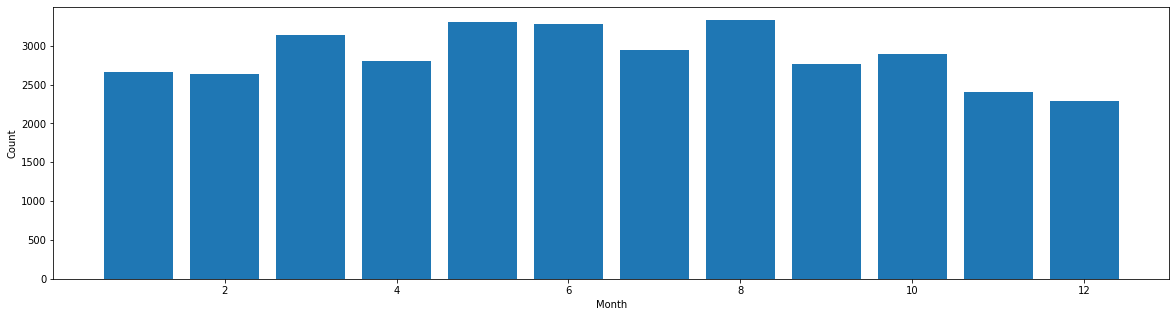

In [19]:
plt.figure(figsize = (20, 5))
plt.bar(month_count.index, month_count)
plt.xlabel('Month')
plt.ylabel('Count');

---
# WEEK 2

In [20]:
building_permits['date_entered'] = pd.to_datetime(building_permits['date_entered'])
building_permits['date_issued'] = pd.to_datetime(building_permits['date_issued'])

In [21]:
building_permits['lapse'] = building_permits['date_issued'] - building_permits['date_entered']

In [22]:
max(building_permits['lapse'])

Timedelta('3371 days 00:00:00')

In [23]:
min(building_permits['lapse'])

Timedelta('0 days 00:00:00')

In [24]:
# two ways to do it. I'm not sure if this should be included.

print(len(building_permits[building_permits['lapse'] > pd.Timedelta('100 days')]))

building_permits['lapse_days'] = building_permits['lapse'].astype(str).str.split(' ').str[0].astype(int)
print(len(building_permits[building_permits['lapse_days'] > 100]))

2631
2631


In [25]:
building_permits['year'] = building_permits['date_issued'].dt.year

In [26]:
building_permits['year'].unique()

array([2019, 2017, 2018, 2016])

In [27]:
building_permits_2019 = building_permits[building_permits['year'] == 2019]

In [28]:
building_permits_2019_council_gb = building_permits_2019.groupby('council_district').count().reset_index().iloc[:,:2]

In [34]:
building_permits_2019_council_gb.columns = ['council_district', 'dist_count']
building_permits_2019_council_gb['council_district'] = building_permits_2019_council_gb['council_district']

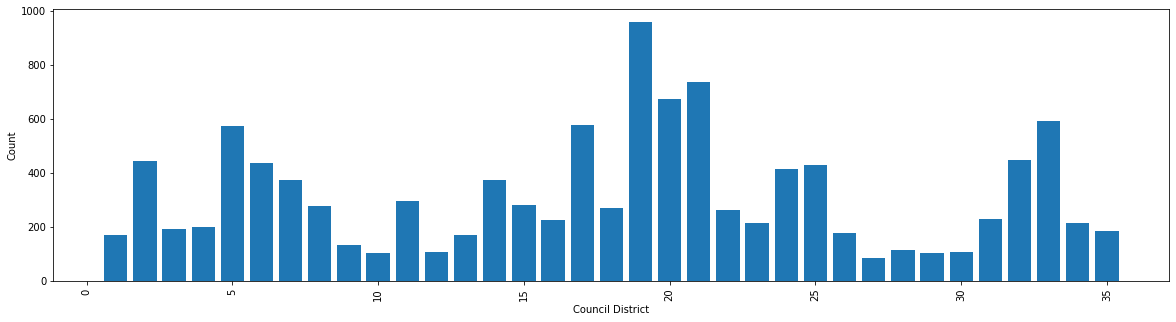

In [35]:
plt.figure(figsize = (20, 5))
plt.bar(building_permits_2019_council_gb['council_district'], building_permits_2019_council_gb['dist_count'])
plt.xticks(rotation = 90)
plt.xlabel('Council District')
plt.ylabel('Count');

In [128]:
strp = pd.read_csv('../data/Residential_Short_Term_Rental_Permits.csv')

In [129]:
strp.columns

Index(['Permit #', 'Applicant', 'Applicant Home Phone',
       'Applicant Mobile Phone', 'Applicant Work Phone',
       'Applicant Work Phone Ext.', 'Contact', 'Contact Home Phone',
       'Contact Mobile Phone', 'Contact Work Phone', 'Contact Work Phone Ext.',
       'Permit Subtype Description', 'Permit Status', 'Parcel', 'Date Entered',
       'Date Issued', 'Expiration Date', 'Address', 'City', 'State', 'ZIP',
       'Subdivision / Lot', 'Purpose', 'Permit Owner Name',
       'Permit Owner Addr. 1', 'Permit Owner Addr. 2', 'Permit Owner Addr. 3',
       'Permit Owner City', 'Permit Owner State', 'Permit Owner ZIP',
       'Permit Type', 'Permit Subtype', 'Council District', 'Census Tract',
       'Mapped Location'],
      dtype='object')

In [130]:
strp = strp[['Permit #', 'Applicant', 'Contact', 'Permit Subtype Description', 'Permit Status', 'Parcel', 'Date Entered', 'Date Issued', 'Expiration Date', 'Address', 'City', 'State', 'ZIP', 'Purpose', 'Permit Owner Name', 'Permit Type', 'Council District', 'Mapped Location']]

In [131]:
strp.columns =['id', 'applicant', 'contact', 'subtype_desc', 'status', 'parcel', 'entered', 'issued',  'expiration', 'address', 'city', 'state', 'zip_code', 'purpose', 'permit_owner_name', 'type', 'council_district', 'mapped_location']

In [132]:
strp['issued'] = pd.to_datetime(strp['issued'])

In [133]:
strp_2019 = strp[(strp['issued'] <= max(building_permits_2019['date_issued']))&
                                                      (strp['issued'] >= min(building_permits_2019['date_issued']))]

In [134]:
strp_2019_council_gb = strp_2019.groupby('council_district').count().reset_index().iloc[:,:2]
strp_2019_council_gb.columns = ['council_district', 'dist_count']
strp_2019_council_gb['council_district'] = strp_2019_council_gb['council_district']

In [135]:
strp_2019_council_gb['permit_type'] = 'short_term_rental'
building_permits_2019_council_gb['permit_type'] = 'building'

In [136]:
building_strp_2019 = pd.concat([building_permits_2019_council_gb, strp_2019_council_gb])

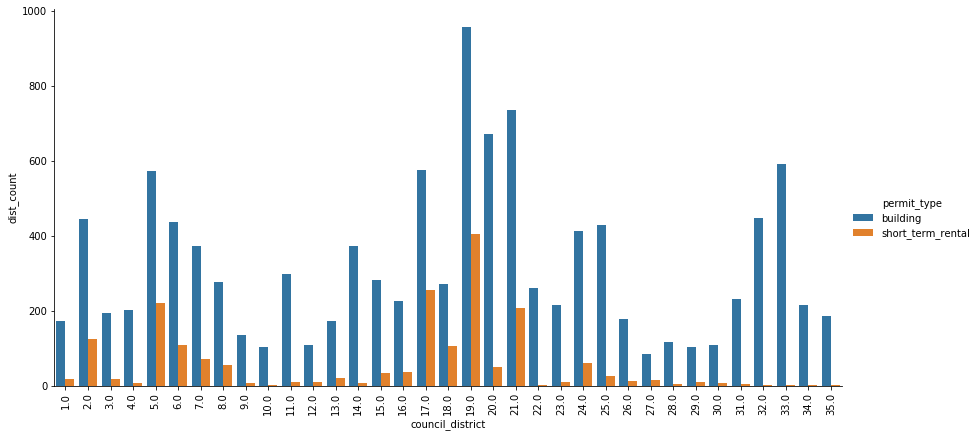

In [137]:
g = sns.catplot(x="council_district", y="dist_count", hue="permit_type", data=building_strp_2019, kind="bar", height = 6, aspect = 2)
plt.xticks(rotation = 90);

In [138]:
building_strp_merge = building_permits.merge(strp, how = 'inner', on = 'parcel')

In [139]:
len(building_strp_merge)

6290

In [140]:
# strp happened before build
len(building_strp_merge[building_strp_merge['date_issued'] > building_strp_merge['issued']])

1623

In [141]:
# strp happened after build
len(building_strp_merge[building_strp_merge['date_issued'] < building_strp_merge['issued']])

4050

In [142]:
# 617 happened at the same time
6290-(4050+1623)

617

In [143]:
# strp usually happens before build, but not by a huge amount

In [144]:
nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
nash_map

In [145]:
db = '../data/stations.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('fire_stations',)]


In [146]:
fire_stations = pd.read_sql_query("SELECT * FROM fire_stations", con)

In [147]:
fire_stations.head()

,district,station_number,address,city,state,lat,lng
0,1,Station 30,3705 Old Clarksville Pike,Joelton,TN,36.316384,-86.876877
1,2,Station 24,3851 Clarksville Highway,Nashville,TN,36.203627,-86.840622
2,2,Station 25,2589 Whites Creek Pike,Nashville,TN,36.215851,-86.801616
3,8,Station 1,130 Broadmoor Avenue,Nashville,TN,36.229579,-86.757426
4,8,Station 31,415 Douglas Avenue,Madison,TN,36.259135,-86.716084


In [148]:
fire_stations.shape

(38, 7)

In [149]:
nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
for ind, row in fire_stations.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point, popup=row['district']).add_to(nash_map)
nash_map

In [150]:
db = '../data/multi_table.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('permits_2018',), ('resident_survey_2018',), ('station_dist',), ('strp_2018',)]


In [151]:
fire_council_survey = pd.read_sql_query("SELECT DISTINCT(station_dist.district), station_dist.station_number, resident_survey_2018.fire_and_ems__overall, resident_survey_2018.fire_services, resident_survey_2018.fire_response_time, resident_survey_2018.fire_professionalism FROM strp_2018 INNER JOIN resident_survey_2018 ON resident_survey_2018.zip_code = strp_2018.zip LEFT JOIN station_dist ON station_dist.district = strp_2018.council_district ORDER BY station_dist.district", con)

"SELECT station_dist.district, station_dist.station_number, resident_survey_2018.fire_and_ems__overall, resident_survey_2018.fire_services, resident_survey_2018.fire_response_time, resident_survey_2018.fire_professionalism
FROM strp_2018
INNER JOIN resident_survey_2018 ON resident_survey_2018.zip_code = strp_2018.zip
LEFT JOIN station_dist ON station_dist.district = strp_2018.council_district"

In [152]:
fire_council_survey#.sort_values('district')

,district,station_number,fire_and_ems__overall,fire_services,fire_response_time,fire_professionalism
0,NaN,None,Satisfied,Don't Know,Don't Know,Don't Know
1,NaN,None,Satisfied,Satisfied,Satisfied,Satisfied
2,1.0,['Station 30'],Satisfied,Satisfied,Satisfied,Satisfied
3,2.0,['Station 24' 'Station 25'],Satisfied,Satisfied,Don't Know,Don't Know
4,2.0,['Station 24' 'Station 25'],Satisfied,Satisfied,Satisfied,Satisfied
5,3.0,['Station 39'],Very Satisfied,Don't Know,Don't Know,Don't Know
6,3.0,['Station 39'],Satisfied,Satisfied,Don't Know,Don't Know
7,4.0,[],Very Satisfied,Satisfied,Satisfied,Satisfied
8,5.0,['Station 3'],Satisfied,Satisfied,Don't Know,Don't Know
9,5.0,['Station 3'],Satisfied,Satisfied,Satisfied,Don't Know


In [153]:
fire_council_survey['district'] = fire_council_survey['district'].fillna(32.0)

In [154]:
fire_council_survey.loc[fire_council_survey['station_number'].isnull(), 'station_number'] = fire_council_survey.loc[fire_council_survey['station_number'].isnull(), 'station_number'].apply(lambda x: [])


In [155]:
fire_council_survey

,district,station_number,fire_and_ems__overall,fire_services,fire_response_time,fire_professionalism
0,32.0,[],Satisfied,Don't Know,Don't Know,Don't Know
1,32.0,[],Satisfied,Satisfied,Satisfied,Satisfied
2,1.0,['Station 30'],Satisfied,Satisfied,Satisfied,Satisfied
3,2.0,['Station 24' 'Station 25'],Satisfied,Satisfied,Don't Know,Don't Know
4,2.0,['Station 24' 'Station 25'],Satisfied,Satisfied,Satisfied,Satisfied
5,3.0,['Station 39'],Very Satisfied,Don't Know,Don't Know,Don't Know
6,3.0,['Station 39'],Satisfied,Satisfied,Don't Know,Don't Know
7,4.0,[],Very Satisfied,Satisfied,Satisfied,Satisfied
8,5.0,['Station 3'],Satisfied,Satisfied,Don't Know,Don't Know
9,5.0,['Station 3'],Satisfied,Satisfied,Satisfied,Don't Know


In [70]:
build_perm_2019_sub = building_permits_2019[(building_permits_2019['type_desc'].str.contains('Residential - New'))&
                      (building_permits_2019['subtype_desc'].str.contains('Multifamily'))]#['subtype_desc'].value_counts()

In [91]:
build_perm_2019_sub[build_perm_2019_sub['mapped_location'].str.contains('1279 HAVENBROOK DR\nNASHVILLE')]

,number,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zip_code,contact,purpose,council_district,mapped_location,month_entered,lapse,lapse_days,year
270,2019056862,Building Residential - New,"Multifamily, Townhome",050020A26400CO,2019-09-18,2019-09-19,137433.0,1279 HAVENBROOK DR,NASHVILLE,TN,37207,"NVR, INC. T/A RYAN HOMES","per master permit 2018079265, to construct a t...",3.0,"1279 HAVENBROOK DR\nNASHVILLE, TN 37207",9,1 days,1,2019


In [93]:
def add_lat_lng(df):
    lat_lng = pd.DataFrame(df['mapped_location'].apply(lambda s: s[s.find("(")+1:s.find(")")].split(', ')))
    lat_lng_df = lat_lng['mapped_location'].apply(pd.Series)
    lat_lng_df.columns = ['lat', 'lng']
    df = pd.concat([df, lat_lng_df], axis = 1)
    return df

In [95]:
build_perm_2019_sub_ll = add_lat_lng(build_perm_2019_sub)

In [119]:
build_perm_2019_sub_ll = build_perm_2019_sub_ll.drop_duplicates(['lat', 'lng']).reset_index(drop=True)

In [120]:
build_perm_2019_sub_ll.shape

(411, 21)

In [84]:
s = build_perm_2019_sub.iloc[0, 14]
s[s.find("(")+1:s.find(")")].split(', ')
#build_perm_2019_sub.iloc[0, 14]#.split('\n')[-1]

['36.196011', '-86.77862']

In [124]:
for ind, row in build_perm_2019_sub_ll.iterrows():
    point = [row['lat'], row['lng']]
    try:
        folium.Marker(point, popup=row['number'], icon=folium.Icon(color='red')).add_to(nash_map)
    except ValueError as e:
#         print(e)
        continue

In [99]:
bad_coords = ['HAVENBROOK DR\nNASHVILLE',
'TUPELO ST\nANTIOCH',
'CENTRAL GROVE SQ\nANTIOCH',
'SUNSET RIDGE LN\nANTIOCH',
'SHIRE DR\nANTIOCH',
'ARBOR TRACE CIR\nNASHVILLE',
'E VILLAGE LN\nNASHVILLE',
'JAMES AVE\nNASHVILLE',
'MILL CREEK MEADOW DR\nNASHVILLE',
'WESTSIDE CIR\nNASHVILLE',
'ETHEL ST\nNASHVILLE',
'BAYPORT AVE\nOLD HICKORY',
'HICKORY INDUSTRIAL DR\nOLD HICKORY',]

In [117]:
build_perm_2019_sub_ll[build_perm_2019_sub_ll['mapped_location'].str.contains('MILL CREEK MEADOW DR\nNASHVILLE')]

,number,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,...,contact,purpose,council_district,mapped_location,month_entered,lapse,lapse_days,year,lat,lng
136,2019038523,Building Residential - New,"Multifamily, Townhome",095020C04000CO,2019-06-28,2019-06-28,184746.0,724 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"724 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,0 days,0,2019,724 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
137,2019038518,Building Residential - New,"Multifamily, Townhome",095020C03900CO,2019-06-28,2019-06-28,220231.0,726 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"726 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,0 days,0,2019,726 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
149,2019038567,Building Residential - New,"Multifamily, Townhome",095020C05000CO,2019-06-28,2019-07-02,216288.0,700 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"700 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,4 days,4,2019,700 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
150,2019038551,Building Residential - New,"Multifamily, Townhome",095020C04600CO,2019-06-28,2019-07-02,216288.0,712 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"712 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,4 days,4,2019,712 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
151,2019038548,Building Residential - New,"Multifamily, Townhome",095020C04500CO,2019-06-28,2019-07-02,220231.0,714 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"714 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,4 days,4,2019,714 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
153,2019038557,Building Residential - New,"Multifamily, Townhome",095020C04800CO,2019-06-28,2019-07-02,220231.0,704 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"704 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,4 days,4,2019,704 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
154,2019038530,Building Residential - New,"Multifamily, Townhome",095020C04100CO,2019-06-28,2019-07-02,220231.0,722 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"722 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,4 days,4,2019,722 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
155,2019038555,Building Residential - New,"Multifamily, Townhome",095020C04700CO,2019-06-28,2019-07-02,220231.0,706 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"706 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,4 days,4,2019,706 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
157,2019038539,Building Residential - New,"Multifamily, Townhome",095020C04400CO,2019-06-28,2019-07-02,184746.0,716 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"716 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,4 days,4,2019,716 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721
158,2019038535,Building Residential - New,"Multifamily, Townhome",095020C04200CO,2019-06-28,2019-07-02,184746.0,720 MILL CREEK MEADOW DR,NASHVILLE,TN,...,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...","per master permit 2017064242, to construct a s...",15.0,"720 MILL CREEK MEADOW DR\nNASHVILLE, TN 37214",6,4 days,4,2019,720 MILL CREEK MEADOW DR\nNASHVILLE,TN 3721


In [219]:
test = strp_2019[(strp_2019['status']=='ISSUED')&
          (strp_2019['subtype_desc'].str.contains('Multifamily'))&
          (strp_2019['purpose'].notnull())]
test[test['purpose'].str.contains('occ.')]#.loc[33, 'purpose']

,id,applicant,contact,subtype_desc,status,parcel,entered,issued,expiration,address,city,state,zip_code,purpose,permit_owner_name,type,council_district,mapped_location
33,2019067442,"3 Trees, LLC","Minty, LLC",Short Term Rental � Multifamily,ISSUED,071070G02900CO,11/04/2019 12:00:00 AM,2019-12-11,12/11/2020 12:00:00 AM,110 DUKE ST 29,NASHVILLE,TN,37207,By making this application for a Residential S...,"3 Trees, LLC",CASR,5.0,"110 DUKE ST 29\nNASHVILLE, TN 37207\n(36.20743..."
35,2019062786,"Hill Center Acklen,LLC","Hosteeva, LLC",Short Term Rental � Multifamily,ISSUED,10412000500,10/15/2019 12:00:00 AM,2019-12-11,12/11/2020 12:00:00 AM,2100 ACKLEN AVE 315,NASHVILLE,TN,37212,By making this application for a Residential S...,"HILL CENTER ACKLEN, LLC",CASR,18.0,"2100 ACKLEN AVE 315\nNASHVILLE, TN 37212\n(36...."
50,2019070280,"Duke Minty, LLC",Duke Minty LLC,Short Term Rental � Multifamily,ISSUED,071070G02700CO,11/15/2019 12:00:00 AM,2019-12-11,12/11/2020 12:00:00 AM,110 DUKE ST 27,NASHVILLE,TN,37207,By making this application for a Residential S...,NaN,CASR,5.0,"110 DUKE ST 27\nNASHVILLE, TN 37207\n(36.20743..."
57,2019067437,"3 Trees, LLC","Minty, LLC",Short Term Rental � Multifamily,ISSUED,071070G02800CO,11/04/2019 12:00:00 AM,2019-12-11,12/11/2020 12:00:00 AM,110 DUKE ST 28,NASHVILLE,TN,37207,By making this application for a Residential S...,"3 Trees, LLC",CASR,5.0,"110 DUKE ST 28\nNASHVILLE, TN 37207\n(36.20743..."
64,2019062755,"Hill Center Acklen,LLC","Hosteeva, LLC",Short Term Rental � Multifamily,ISSUED,10412000500,10/15/2019 12:00:00 AM,2019-12-11,12/11/2020 12:00:00 AM,2100 ACKLEN AVE 204,NASHVILLE,TN,37212,By making this application for a Residential S...,"HILL CENTER ACKLEN, LLC",CASR,18.0,"2100 ACKLEN AVE 204\nNASHVILLE, TN 37212\n(36...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9506,2019009907,"Dormigo / Sit Back Host, LLC","Dormigo / Sit Back Host, LLC",Short Term Rental � Multifamily,ISSUED,09215004300,02/19/2019 12:00:00 AM,2019-03-14,03/14/2020 12:00:00 AM,220 25TH AVE N 308,NASHVILLE,TN,37203,By making this application for Short Term Rent...,PARKCENTRAL JOINT VENTURE LLC,CASR,21.0,"220 25TH AVE N 308\nNASHVILLE, TN 37203\n(36.1..."
9514,2019021481,"SWAFFORD, JONATHAN A. & MYERS, JESSICA","Playlist Properties, Inc.",Short Term Rental � Multifamily,ISSUED,093024A30800CO,04/12/2019 12:00:00 AM,2019-04-18,04/18/2020 12:00:00 AM,178 2ND AVE N 308,NASHVILLE,TN,37201,By making this application for a Residential S...,"SWAFFORD, JONATHAN A. & MYERS, JESSICA",CASR,19.0,"178 2ND AVE N 308\nNASHVILLE, TN 37201\n(36.16..."
9519,2019017361,"Tri Stone Properties, LLC",Kevin Shaeffer,Short Term Rental � Multifamily,ISSUED,09302317300,03/25/2019 12:00:00 AM,2019-04-03,04/03/2020 12:00:00 AM,212 3RD AVE N 301,NASHVILLE,TN,37201,By making this application for a Residential S...,"Tri Stone Properties, LLC",CASR,19.0,"212 3RD AVE N 301\nNASHVILLE, TN 37201\n(36.16..."
9525,2019014142,Melanie Gowdt,Brittani White,Short Term Rental � Multifamily,ISSUED,07113000200,03/11/2019 12:00:00 AM,2019-04-12,04/12/2020 12:00:00 AM,281 CUMBERLAND BND 147,NASHVILLE,TN,37228,By making this application for Short Term Rent...,"DUKE APARTMENTS OF NASHVILLE, LLC, THE",CASR,2.0,"281 CUMBERLAND BND 147\nNASHVILLE, TN 37228\n(..."


In [174]:
strp_2019.loc[31,'purpose'].split('person maximum occupancy')[0].split(' ')[-2]

'12'

In [221]:
strp_2019_sub_ll = add_lat_lng(strp_2019[(strp_2019['status']=='ISSUED')&
          (strp_2019['subtype_desc'].str.contains('Multifamily'))&
          (strp_2019['purpose'].str.contains('Property is not Owner occupied'))]).drop_duplicates(['lat', 'lng'])

In [196]:
strp_2019_sub_ll.shape

(408, 20)

In [159]:
for ind, row in strp_2019_sub_ll.iterrows():
    point = [row['lat'], row['lng']]
    try:
        folium.Marker(point, popup=row['id'], icon=folium.Icon(color='green')).add_to(nash_map)
    except ValueError as e:
#         print(e)
        continue

In [211]:
nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
for ind, row in strp_2019_sub_ll.iterrows():
    point = [row['lat'], row['lng']]
    try:
        folium.Marker(point, popup=row['id'], icon=folium.Icon(color='green')).add_to(nash_map)
    except ValueError as e:
#         print(e)
        continue
for ind, row in build_perm_2019_sub_ll.iterrows():
    point = [row['lat'], row['lng']]
    try:
        folium.Marker(point, popup=row['number'], icon=folium.Icon(color='red')).add_to(nash_map)
    except ValueError as e:
#         print(e)
        continue
for ind, row in fire_stations.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point, popup=row['district']).add_to(nash_map)
nash_map